Proje Data science DIO

## Projeto: Previsão de Vendas Anuais com Regressão Linear

#### O objetivo deste projeto é aplicar um modelo de regressão linear simples para analisar e prever o volume de vendas anuais de uma empresa, utilizando como base um histórico de dados reais.

#### Através dessa análise, buscamos identificar tendências ao longo do tempo, quantificar o relacionamento entre o ano e as vendas e projetar o comportamento futuro do mercado para os próximos anos.

#### Essa previsão pode servir como uma ferramenta estratégica para suporte à tomada de decisões gerenciais, como definição de metas, planejamento de produção e estratégias de marketing.

#### Além da modelagem, o projeto inclui uma etapa de análise exploratória de dados (EDA), avaliação quantitativa do desempenho do modelo e visualização dos resultados, garantindo uma abordagem analítica completa.

In [54]:
# ===========================================
# 📌 1. Importação das bibliotecas
# ===========================================

# Nesta etapa, vamos importar as bibliotecas necessárias para manipulação de dados,
# criação do modelo de regressão linear, avaliação de desempenho e visualização dos resultados.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Configuração estética do Seaborn para gráficos mais bonitos
sns.set_style("whitegrid")


In [55]:
# ===========================================
# 📌 2. Carregamento e Exploração Inicial dos Dados
# ===========================================

# Aqui vamos carregar o dataset contendo o histórico de vendas.
# Em seguida, faremos uma exploração inicial para entender o formato dos dados, 
# verificar tipos de variáveis e a existência de valores ausentes.

from IPython.display import display

caminho_arquivo = "C:/Users/DIO - Data Science/Data Science/historico_vendas.csv"
df = pd.read_csv(caminho_arquivo, index_col="TS", parse_dates=True)

# Visualização inicial
print("\n==== Primeiras linhas dos dados ====")
display(df.head())

print("\n==== Informações gerais ====")
display(df.info())  # Info continua com print, porque display não funciona bem com info()

print("\n==== Estatísticas Descritivas ====")
display(df.describe())

print("\n==== Verificação de valores ausentes ====")
display(df.isnull().sum().to_frame(name='Total de Nulos'))



==== Primeiras linhas dos dados ====


,Sales
TS,
1964-12-31,41738
1965-12-31,46370
1966-12-31,52052
1967-12-31,60192
1968-12-31,64447



==== Informações gerais ====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 1964-12-31 to 1971-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   8 non-null      int64
dtypes: int64(1)
memory usage: 128.0 bytes


None


==== Estatísticas Descritivas ====


,Sales
count,8.000000
mean,57640.750000
std,9929.173232
min,41738.000000
25%,50631.500000
50%,60135.500000
75%,65257.000000
max,68561.000000



==== Verificação de valores ausentes ====


,Total de Nulos
Sales,0


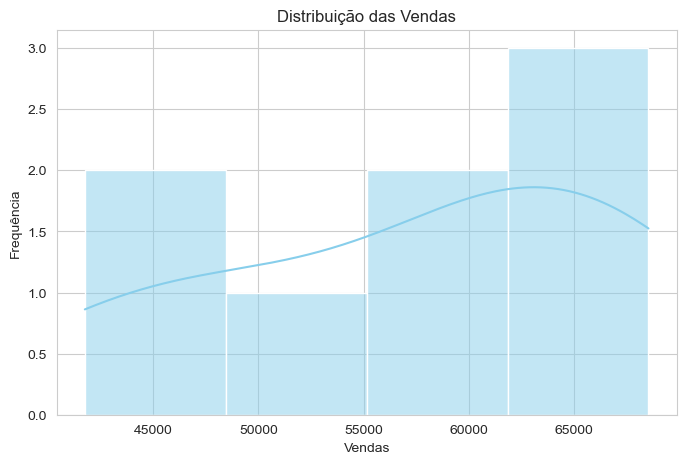

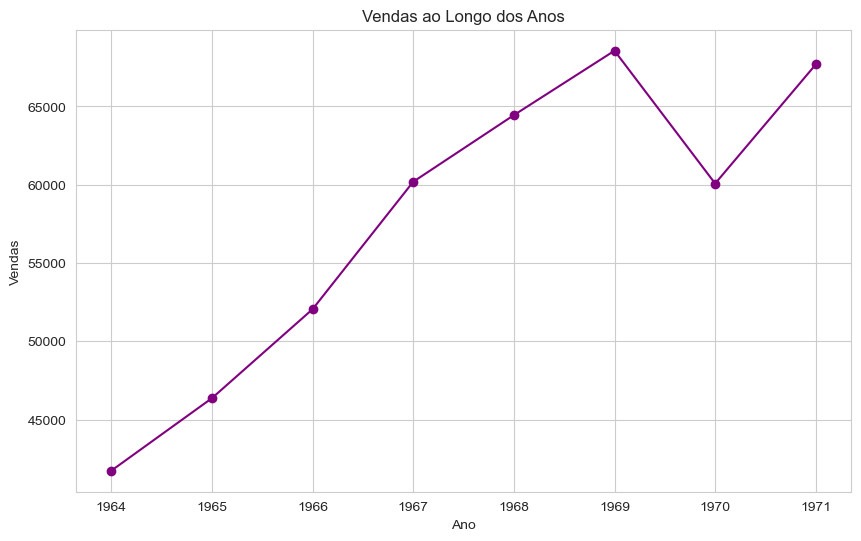

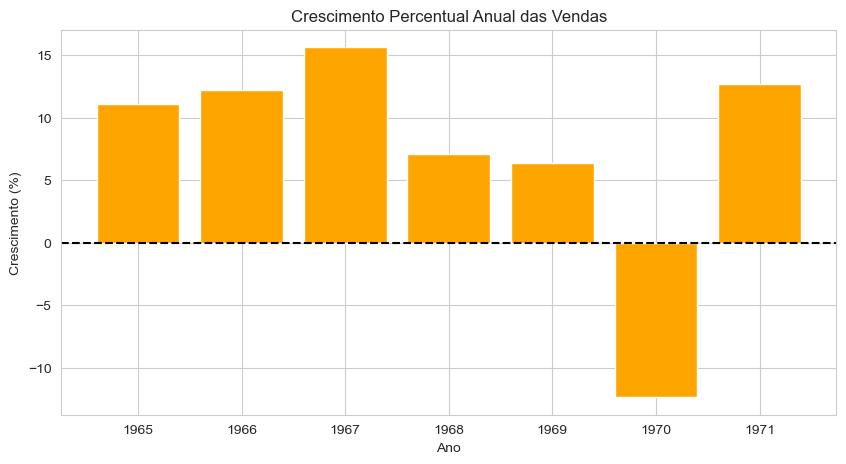


==== Crescimento Percentual por Ano ====
TS
1964-12-31          NaN
1965-12-31    11.097801
1966-12-31    12.253612
1967-12-31    15.638208
1968-12-31     7.069046
1969-12-31     6.383540
1970-12-31   -12.371465
1971-12-31    12.663327
Name: Crescimento (%), dtype: float64


In [46]:
# ===========================================
# 📌 3. Análise Exploratória de Dados (EDA)
# ===========================================

# Aqui vamos analisar a distribuição das vendas, sua evolução ao longo dos anos
# e o crescimento percentual anual.

# Distribuição das vendas
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], kde=True, color="skyblue")
plt.title("Distribuição das Vendas")
plt.xlabel("Vendas")
plt.ylabel("Frequência")
plt.show()

# Tendência temporal das vendas
plt.figure(figsize=(10, 6))
plt.plot(df.index.year, df["Sales"], marker='o', linestyle='-', color='purple')
plt.title("Vendas ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()

# Crescimento percentual ano a ano
df["Crescimento (%)"] = df["Sales"].pct_change() * 100
plt.figure(figsize=(10, 5))
plt.bar(df.index.year[1:], df["Crescimento (%)"].dropna(), color="orange")
plt.title("Crescimento Percentual Anual das Vendas")
plt.xlabel("Ano")
plt.ylabel("Crescimento (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

print("\n==== Crescimento Percentual por Ano ====")
print(df["Crescimento (%)"])


In [47]:
# ===========================================
# 📌 4. Preparação dos Dados para o Modelo
# ===========================================

# Vamos agora preparar as variáveis de entrada (X) e saída (Y).
# X será o ano (feature independente) e Y será o total de vendas (target dependente).

X = df.index.year.values.reshape(-1, 1)  # Variável independente
Y = df["Sales"].values  # Variável dependente


In [48]:
# ===========================================
# 📌 5. Criação e Treinamento do Modelo de Regressão Linear
# ===========================================

# Nesta etapa, vamos criar um modelo de regressão linear simples,
# utilizando a biblioteca Scikit-Learn, e treiná-lo com os dados históricos.

modelo = LinearRegression()
modelo.fit(X, Y)


LinearRegression()

In [49]:
# ===========================================
# 📌 6. Avaliação de Desempenho do Modelo
# ===========================================

# Após o treinamento, vamos avaliar o modelo utilizando métricas como:
# - R² (Coeficiente de Determinação)
# - MSE (Erro Quadrático Médio)
# - RMSE (Raiz do Erro Quadrático Médio)
# - RMSE como percentual da média das vendas (para ter uma noção percentual do erro)

y_pred = modelo.predict(X)

r2 = r2_score(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
rmse_percentual = (rmse / np.mean(Y)) * 100

print(f"\n==== Avaliação do Modelo ====")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"RMSE como % da média das vendas: {rmse_percentual:.2f}%")



==== Avaliação do Modelo ====
R² (Coeficiente de Determinação): 0.7969
MSE (Erro Quadrático Médio): 17516586.93
RMSE (Raiz do Erro Quadrático Médio): 4185.28
RMSE como % da média das vendas: 7.26%


In [50]:
# ===========================================
# 📌 7. Previsões Futuras (Próximos 3 Anos)
# ===========================================

# Vamos agora usar o modelo treinado para prever as vendas dos próximos anos (1972, 1973, 1974).

anos_futuro = np.array([1972, 1973, 1974]).reshape(-1, 1)
previsoes_futuro = modelo.predict(anos_futuro)

print("\n==== Previsões Futuras ====")
for ano, pred in zip(anos_futuro.flatten(), previsoes_futuro):
    print(f"Ano {ano}: {pred:.2f} vendas previstas")



==== Previsões Futuras ====
Ano 1972: 73924.86 vendas previstas
Ano 1973: 77543.55 vendas previstas
Ano 1974: 81162.24 vendas previstas


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


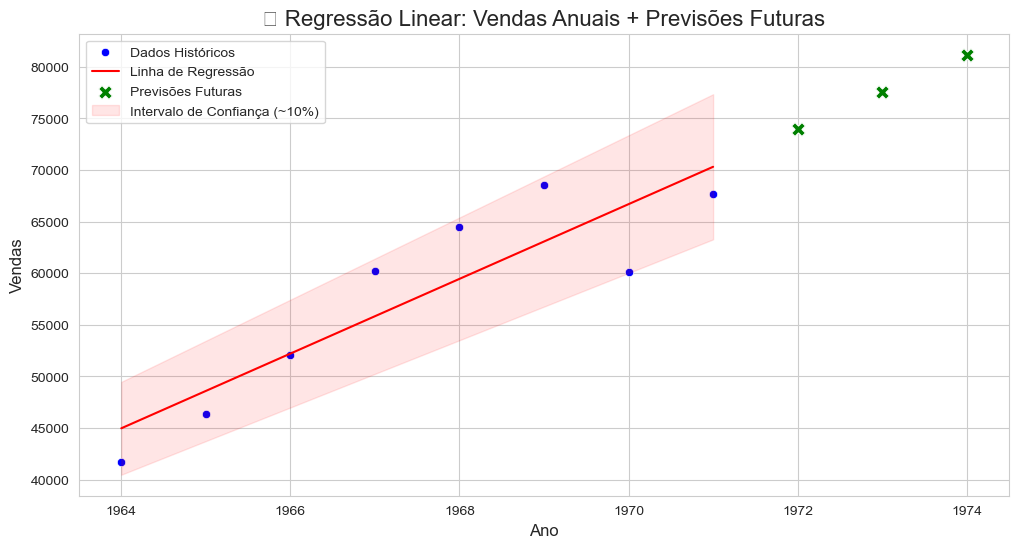

In [53]:
# ===========================================
# 📌 8. Visualização Final com Regressão + Previsões + Intervalo de Confiança
# ===========================================

# Nesta etapa, vamos visualizar:
# - Os dados históricos
# - A linha da regressão linear
# - As previsões futuras
# - Um intervalo de confiança simples (±10%, apenas para fins ilustrativos)

plt.figure(figsize=(12, 6))

# Dados históricos
sns.scatterplot(x=X.flatten(), y=Y, color="blue", label="Dados Históricos")

# Linha de regressão
sns.lineplot(x=X.flatten(), y=y_pred, color="red", label="Linha de Regressão")

# Previsões futuras
sns.scatterplot(x=anos_futuro.flatten(), y=previsoes_futuro, color='green', label='Previsões Futuras', marker="X", s=100)

# Intervalo de confiança simples (apenas ilustrativo)
inferior = y_pred * 0.9
superior = y_pred * 1.1
plt.fill_between(X.flatten(), inferior, superior, color='red', alpha=0.1, label="Intervalo de Confiança (~10%)")

# Layout final
plt.title("📈 Regressão Linear: Vendas Anuais + Previsões Futuras", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Vendas", fontsize=12)
plt.legend()
plt.show()
